In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [24]:
data = pd.read_csv("/kaggle/input/dataset/emotions.csv")

In [25]:
data

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
0          4.620      30.3    -356.0     15.60      26.3       1.070   
1         28.800      33.1      32.0     25.80      22.8       6.550   
2          8.900      29.4    -416.0     16.70      23.7      79.900   
3         14.900      31.6    -143.0     19.80      24.3      -0.584   
4         28.300      31.3      45.2     27.30      24.5      34.800   
...          ...       ...       ...       ...       ...         ...   
2127      32.400      32.2      32.2     30.80      23.4       1.640   
2128      16.300      31.3    -284.0     14.30      23.9       4.200   
2129      -0.547      28.3    -259.0     15.80      26.7       9.080   
2130      16.800      19.9    -288.0      8.34      26.0       2.460   
2131      27.000      32.0      31.8     25.00      28.9       4.990   

      mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  \
0          0.411     -15.700       2.060        3.15  ...      23.50   
1          1.680       2.880       3.830       -4.82  ...     -23.30   
2          3.360      90.200      89.900        2.03  ...     462.00   
3         -0.284       8.820       2.300       -1.97  ...     299.00   
4         -5.790       3.060      41.400        5.52  ...      12.00   
...          ...         ...         ...         ...  ...        ...   
2127      -2.030       0.647      -0.121       -1.10  ...     -21.70   
2128       1.090       4.460       4.720        6.63  ...     594.00   
2129       6.900      12.700       2.030        4.64  ...     370.00   
2130       1.580     -16.000       1.690        4.74  ...     124.00   
2131       1.950       6.210       3.490       -3.51  ...       1.95   

      fft_742_b  fft_743_b  fft_744_b  fft_745_b  fft_746_b  fft_747_b  \
0        20.300     20.300      23.50     -215.0     280.00    -162.00   
1       -21.800    -21.800     -23.30      182.0       2.57     -31.60   
2      -233.000   -233.000     462.00     -267.0     281.00    -148.00   
3      -243.000   -243.000     299.00      132.0     -12.40       9.53   
4        38.100     38.100      12.00      119.0     -17.60      23.90   
...         ...        ...        ...        ...        ...        ...   
2127      0.218      0.218     -21.70       95.2     -19.90      47.20   
2128   -324.000   -324.000     594.00      -35.5     142.00     -59.80   
2129   -160.000   -160.000     370.00      408.0    -169.00     -10.50   
2130    -27.600    -27.600     124.00     -656.0     552.00    -271.00   
2131      1.810      1.810       1.95      110.0      -6.71      22.80   

      fft_748_b  fft_749_b     label  
0       -162.00     280.00  NEGATIVE  
1        -31.60       2.57   NEUTRAL  
2       -148.00     281.00  POSITIVE  
3          9.53     -12.40  POSITIVE  
4         23.90     -17.60   NEUTRAL  
...         ...        ...       ...  
2127      47.20     -19.90   NEUTRAL  
2128     -59.80     142.00  POSITIVE  
2129     -10.50    -169.00  NEGATIVE  
2130    -271.00     552.00  NEGATIVE  
2131      22.80      -6.71   NEUTRAL  

[2132 rows x 2549 columns]

In [26]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']
sample

fft_0_b     -508.0
fft_1_b      438.0
fft_2_b     -222.0
fft_3_b     -222.0
fft_4_b      438.0
             ...  
fft_745_b   -215.0
fft_746_b    280.0
fft_747_b   -162.0
fft_748_b   -162.0
fft_749_b    280.0
Name: 0, Length: 750, dtype: object

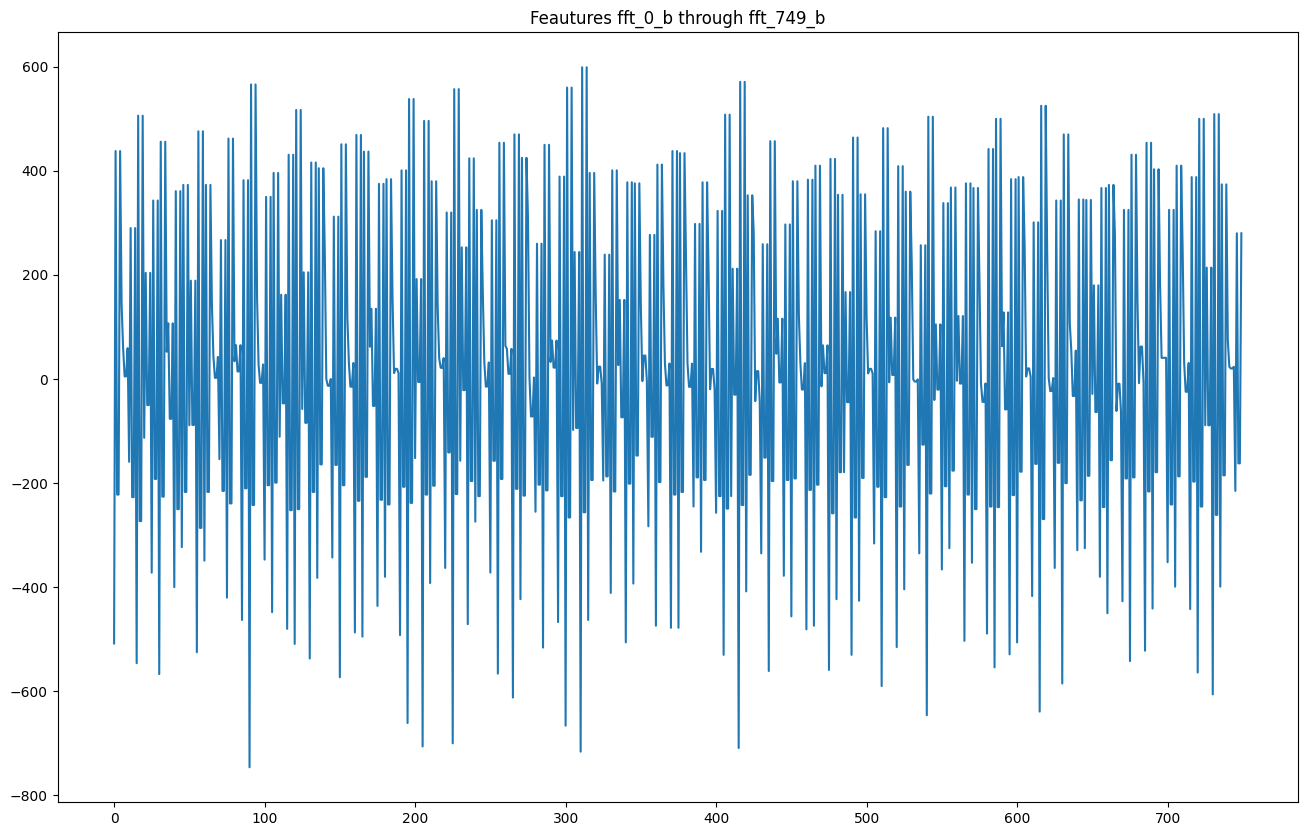

In [27]:
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title('Feautures fft_0_b through fft_749_b')
plt.show()

In [28]:
data['label'].value_counts()

label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64

<Axes: >

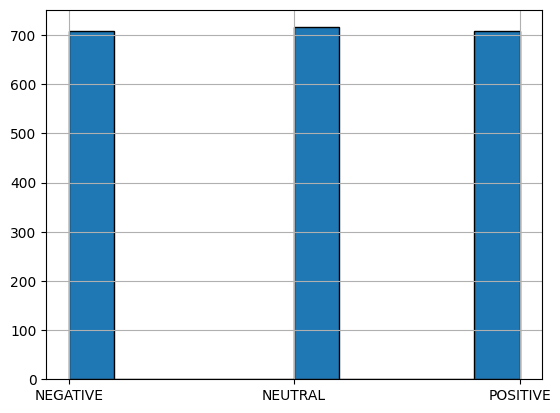

In [29]:
data['label'].hist(edgecolor='black')

In [30]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [31]:
original_data = data.copy()
data["label"] = data["label"].replace(label_mapping)

y = data["label"]
x = data.drop("label", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

/tmp/ipykernel_34/1063426523.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["label"] = data["label"].replace(label_mapping)


In [32]:
x_train

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
480       -2.450      24.6      2.16   -10.400      18.9      -2.650   
1394       6.340      16.9     22.40     0.164      23.1      -1.590   
1204      12.900      30.5   -269.00    13.100      23.8       1.120   
1654     -12.400      26.6   -870.00     8.590      24.8       7.880   
1010      15.400      26.6   -137.00    14.900      29.4      -0.609   
...          ...       ...       ...       ...       ...         ...   
1638      13.900      17.5   -327.00     3.810      27.1      -6.400   
1095      31.300      31.0     30.70    28.900      27.5       2.800   
1130       0.959      24.5      7.31   -12.600      21.2      -4.170   
1294      26.700      29.3     22.70    26.000      25.9       8.500   
860       13.300      31.8   -147.00    11.300      29.1      -0.723   

      mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_740_b  \
480       -0.101       7.930      1.2500       6.290  ...      111.0   
1394      -0.530      -0.792      0.3130       0.414  ...       74.7   
1204      -1.890      27.900      2.6300      -2.040  ...     -683.0   
1654      -1.530      -2.680     -0.4580      -3.810  ...     -760.0   
1010       0.198      17.700      0.3730       2.000  ...      281.0   
...          ...         ...         ...         ...  ...        ...   
1638      -5.460       8.670     -0.0145       3.070  ...     -598.0   
1095       0.253      -3.680     -1.1800      12.300  ...      148.0   
1130       0.307     -18.300      3.1700     -10.700  ...       83.4   
1294       1.680      -2.560      1.6700      -0.216  ...      150.0   
860        2.160      22.100     -2.5400       1.580  ...      373.0   

      fft_741_b  fft_742_b  fft_743_b  fft_744_b  fft_745_b  fft_746_b  \
480       54.60      20.60      20.60      54.60       70.4     -21.50   
1394      -8.65       9.79       9.79      -8.65       96.2      -1.54   
1204     545.00    -229.00    -229.00     545.00     -136.0     172.00   
1654     781.00    -309.00    -309.00     781.00     -701.0     702.00   
1010     -77.50      56.20      56.20     -77.50     -245.0     321.00   
...         ...        ...        ...        ...        ...        ...   
1638     523.00    -190.00    -190.00     523.00      239.0      -3.29   
1095       1.69      14.40      14.40       1.69      119.0      -5.84   
1130      29.80      -9.69      -9.69      29.80       23.6     -35.40   
1294      -2.57     -11.80     -11.80      -2.57      148.0     -12.50   
860      -96.10      40.80      40.80     -96.10      120.0      45.90   

      fft_747_b  fft_748_b  fft_749_b  
480      -56.20     -56.20     -21.50  
1394     -22.70     -22.70      -1.54  
1204     -34.90     -34.90     172.00  
1654    -184.00    -184.00     702.00  
1010    -152.00    -152.00     321.00  
...         ...        ...        ...  
1638       3.25       3.25      -3.29  
1095       3.71       3.71      -5.84  
1130     -35.80     -35.80     -35.40  
1294      14.30      14.30     -12.50  
860      -73.00     -73.00      45.90  

[1705 rows x 2548 columns]

In [33]:
y_train

480     2
1394    2
1204    2
1654    0
1010    0
       ..
1638    0
1095    1
1130    2
1294    1
860     0
Name: label, Length: 1705, dtype: int64

In [34]:
# Building the RNN

from keras.models import Sequential
from keras.layers import GRU
from keras.layers import Dropout
from keras.layers import Dense

model = Sequential()

model.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=2), input_shape=(x_train.shape[1],)))

model.add(GRU(units=256,return_sequences=True))

model.add(tf.keras.layers.Flatten())

model.add(Dense(units=3, activation = "softmax"))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/lambda_layer.py:66: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ (None, 2548, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 2548, 256)      │       198,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 652288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │     1,956,867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,155,779 (8.22 MB)

 Trainable params: 2,155,779 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [36]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=7,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.6527 - loss: 52.4166 - val_accuracy: 0.9267 - val_loss: 5.6744
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9284 - loss: 3.6426 - val_accuracy: 0.9531 - val_loss: 1.6354
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9342 - loss: 4.5815 - val_accuracy: 0.9589 - val_loss: 1.8130
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9746 - loss: 0.7407 - val_accuracy: 0.9032 - val_loss: 4.0039
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.9501 - loss: 2.2150 - val_accuracy: 0.9648 - val_loss: 1.3982
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.9945 - loss: 0.0838 - val_accuracy: 0.9765 - val_loss: 0.9080
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.9891 - loss: 0.4023 - val_accuracy: 0.9560 - val_loss: 3.1080
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.9751 - loss: 0.9818 - val_accuracy: 0

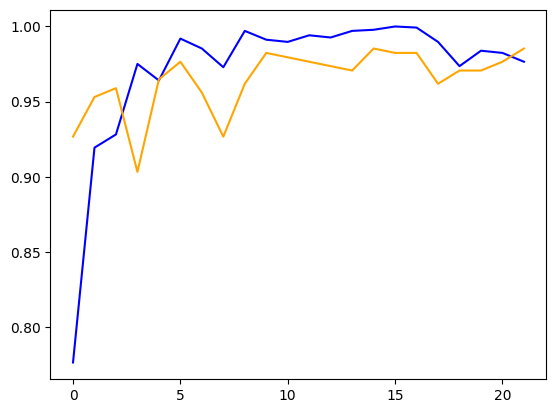

In [37]:
plt.plot(history.history["accuracy"], color = "blue")
plt.plot(history.history["val_accuracy"],  color = "orange")

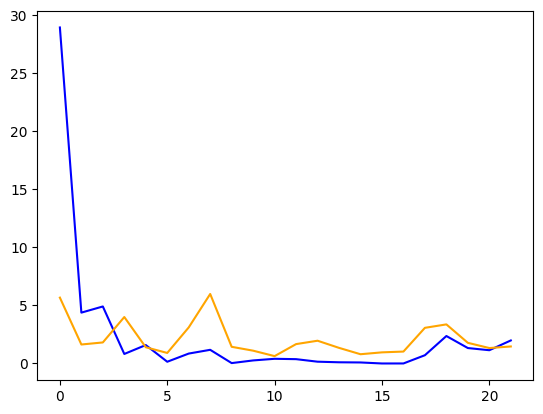

In [38]:
plt.plot(history.history["loss"], color = "blue")
plt.plot(history.history["val_loss"],  color = "orange")

In [39]:
model_acc = model.evaluate(x_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.2f}%".format(model_acc * 100))

Test Accuracy: 98.13%


In [40]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


array([1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1,
       0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1,
       2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0,
       0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2,
       0, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 0,
       2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0,
       2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0,
       0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2,
       2, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 0,

In [41]:
y_test = np.array(y_test)
y_test

array([1, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1,
       0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1,
       2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0,
       0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2,
       0, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0,
       2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0,
       2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1,
       1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0,
       0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2,
       2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0,

In [42]:
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),axis=1))

[[1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [0 2]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]

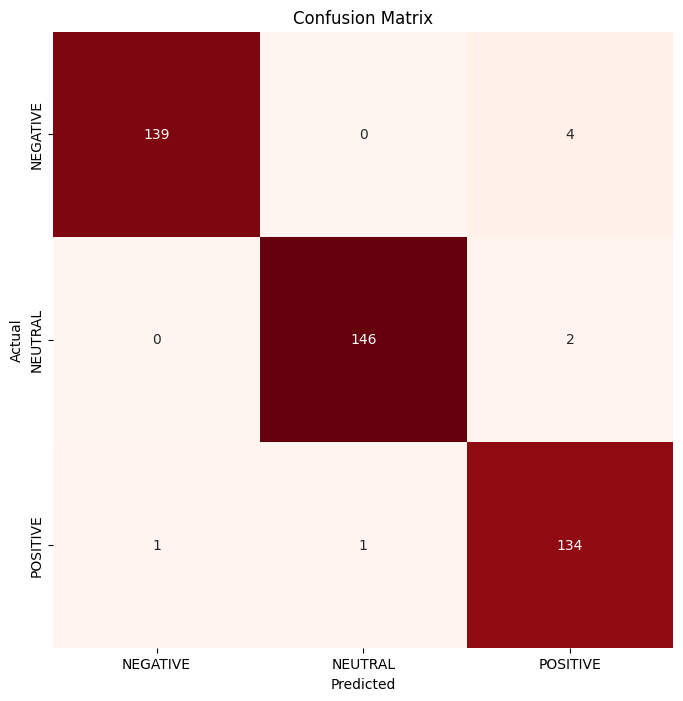

In [43]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Reds')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [44]:
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.99      0.97      0.98       143
     NEUTRAL       0.99      0.99      0.99       148
    POSITIVE       0.96      0.99      0.97       136

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427

